Preprocessing images...
Splitting data into training and validation sets...
Training models...
Evaluating random_forest model...
Accuracy: 0.80

Classification Report:
                         precision    recall  f1-score   support

         Aidil ramadhan       0.85      0.97      0.91        66
           Alif Risaldy       0.77      0.82      0.79        28
         Amirul Ganteng       0.95      0.92      0.93        38
              ara cimol       0.87      1.00      0.93        26
                  Aulia       0.85      0.46      0.59        24
                  Bagus       0.86      1.00      0.92        24
                  Fitra       0.92      0.88      0.90        41
                 Hajera       0.73      0.44      0.55        25
I Wayan Arigayu Saputra       0.86      0.72      0.78        25
              Imam Agil       0.88      0.92      0.90        25
       Jessica Andryani       0.54      0.64      0.58        33
         Juan P Kuganda       0.80      0.52      0

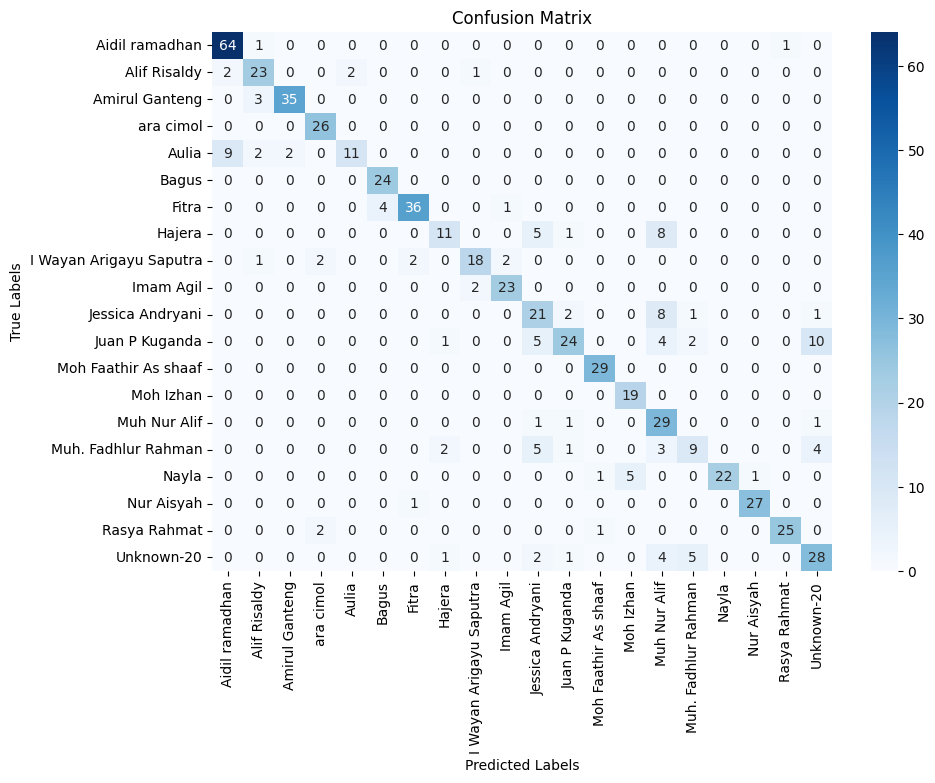

In [9]:
#Hajera_F55123047
#Kelas TIB

import os
import numpy as np # type: ignore
import cv2 # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # type: ignore
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Modul 1: Preprocessing Data
def preprocess_images(image_folder, img_size=(128, 128), color_mode='rgb'):
    
    data = []
    labels = []
    class_names = []

    for label, class_name in enumerate(os.listdir(image_folder)):
        class_folder = os.path.join(image_folder, class_name)

        if not os.path.isdir(class_folder):
            continue

        class_names.append(class_name)
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)

            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            if color_mode == 'grayscale':
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                data.append(img.flatten())
            else:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                data.append(img_array.flatten())

            labels.append(label)

    return np.array(data), np.array(labels), class_names

# Modul 2: Membagi Data
def split_data(features, labels, test_size=0.2, random_state=42):
    return train_test_split(features, labels, test_size=test_size, random_state=random_state)

# Modul 3: Training Model
def train_random_forest(X_train, y_train, n_estimators=100):

    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

def evaluate_model(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")

    unique_labels = np.unique(np.concatenate((y_test, y_pred)))

    filtered_class_names = [
        class_names[i] if i < len(class_names) else f"Unknown-{i}" for i in unique_labels
    ]

    print(classification_report(y_test, y_pred, target_names=filtered_class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_class_names, yticklabels=filtered_class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    return accuracy


# Modul 5: Visualisasi Akurasi

def plot_accuracies(accuracies, model_names):

    plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.ylim(0, 1)
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
    plt.show()

# Main Program
if __name__ == "__main__":

    image_folder = r"D:\Semester 3\tanda_tangan\TTD\ttd"

    # Step 1: Preprocess data
    print("Preprocessing images...")
    features, labels, class_names = preprocess_images(image_folder)

    # Step 2: Split data
    print("Splitting data into training and validation sets...")
    X_train, X_test, y_train, y_test = split_data(features, labels)

    # Step 3: Train models
    print("Training models...")
    rf_model = train_random_forest(X_train, y_train)
    # Step 4: Evaluate models
    print("Evaluating random_forest model...")
    rf_accuracy = evaluate_model(rf_model, X_test, y_test, class_names)